# Complex networks: theory and applications
## Assignment 3: G(n,p) graph - notebook to process the generated data


#### Andrea Senacheribbe

---

In [1]:
figpath="figures/"

In [2]:
import numpy as np
import scipy.sparse as sparse, scipy.sparse.csgraph as sgraph, scipy.sparse.linalg as slinalg
import matplotlib.pyplot as plt, matplotlib.cm as cm
import numba as nb
import pandas as pd
import scipy.stats as stats

In [3]:
df=pd.read_pickle("./results.pkl")

In [4]:
df.drop(['degree'], axis=1)

,n,p(n),connected,giant,diameter,1st cc,2nd cc,deg_min,deg_max
0,100,0.5/n,0.00,0.05,3.89,5.90,4.310000,0,4
1,100,0.9/n,0.00,0.71,8.07,14.88,7.990000,0,6
2,100,1.1/n,0.00,0.92,11.76,27.47,9.270000,0,8
3,100,1.5/n,0.00,1.00,15.03,53.39,7.190000,0,7
4,100,2/n,0.00,1.00,13.68,78.19,3.710000,0,9
5,100,0.5 log(n)/n,0.00,1.00,11.44,86.58,2.210000,0,9
6,100,0.9 log(n)/n,0.21,1.00,6.69,98.46,1.050633,0,12
7,100,1.1 log(n)/n,0.59,1.00,5.83,99.44,1.000000,0,14
8,100,1.5 log(n)/n,0.85,1.00,4.43,99.84,1.000000,0,19
9,100,2 log(n)/n,0.98,1.00,4.03,99.98,1.000000,0,23


In [5]:
df[df.n==100000].drop(['degree', 'n'], axis=1)

,p(n),connected,giant,diameter,1st cc,2nd cc,deg_min,deg_max
33,0.5/n,0.00,0.0,12.55,25.90,22.47,0,8
34,0.9/n,0.00,0.0,50.52,301.06,211.81,0,9
35,1.1/n,0.00,1.0,160.08,17384.43,319.00,0,10
36,1.5/n,0.00,1.0,52.59,58202.49,38.24,0,11
37,2/n,0.00,1.0,31.90,79673.69,14.96,0,13
38,0.5 log(n)/n,0.00,1.0,11.08,99678.32,2.02,0,22
39,0.9 log(n)/n,0.03,1.0,7.60,99996.89,1.00,0,31
40,1.1 log(n)/n,0.76,1.0,7.00,99999.74,1.00,0,38
41,1.5 log(n)/n,1.00,1.0,6.00,100000.00,NaN,1,44
42,2 log(n)/n,1.00,1.0,5.00,100000.00,NaN,2,54


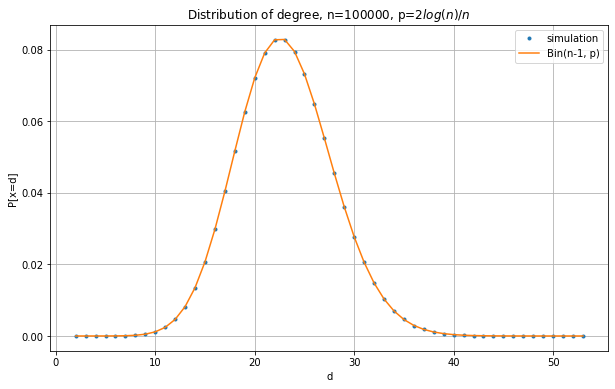

In [6]:
n=100000
p=2*np.log(n)/n

row=df[(df.n==n)&(df["p(n)"]=="2 log(n)/n")].iloc[0]

plt.figure(figsize=(10,6))
x=np.arange(row.deg_min, row.deg_max)
plt.plot(x,row.degree,'.')
plt.plot(x, stats.binom.pmf(x, n-1, p))
plt.title("Distribution of degree, n=100000, p=$2log(n)/n$")
plt.grid(True)
plt.xlabel("d")
plt.ylabel("P[x=d]")
plt.legend(["simulation", "Bin(n-1, p)"]);
plt.savefig(figpath+"distribution.pdf")

### For the report:

In [7]:
print(df.drop(['degree'], axis=1).to_latex(index=False))

\begin{tabular}{llrrrrrll}
\toprule
      n &          p(n) &  connected &  giant &  diameter &     1st cc &      2nd cc & deg\_min & deg\_max \\
\midrule
    100 &         0.5/n &       0.00 &   0.05 &      3.89 &       5.90 &    4.310000 &       0 &       4 \\
    100 &         0.9/n &       0.00 &   0.71 &      8.07 &      14.88 &    7.990000 &       0 &       6 \\
    100 &         1.1/n &       0.00 &   0.92 &     11.76 &      27.47 &    9.270000 &       0 &       8 \\
    100 &         1.5/n &       0.00 &   1.00 &     15.03 &      53.39 &    7.190000 &       0 &       7 \\
    100 &           2/n &       0.00 &   1.00 &     13.68 &      78.19 &    3.710000 &       0 &       9 \\
    100 &  0.5 log(n)/n &       0.00 &   1.00 &     11.44 &      86.58 &    2.210000 &       0 &       9 \\
    100 &  0.9 log(n)/n &       0.21 &   1.00 &      6.69 &      98.46 &    1.050633 &       0 &      12 \\
    100 &  1.1 log(n)/n &       0.59 &   1.00 &      5.83 &      99.44 &    1.000000 &   

In [8]:
print(df[df.n==100000].drop(['degree', 'n'], axis=1).to_latex(index=False))

\begin{tabular}{lrrrrrll}
\toprule
         p(n) &  connected &  giant &  diameter &     1st cc &  2nd cc & deg\_min & deg\_max \\
\midrule
        0.5/n &       0.00 &    0.0 &     12.55 &      25.90 &   22.47 &       0 &       8 \\
        0.9/n &       0.00 &    0.0 &     50.52 &     301.06 &  211.81 &       0 &       9 \\
        1.1/n &       0.00 &    1.0 &    160.08 &   17384.43 &  319.00 &       0 &      10 \\
        1.5/n &       0.00 &    1.0 &     52.59 &   58202.49 &   38.24 &       0 &      11 \\
          2/n &       0.00 &    1.0 &     31.90 &   79673.69 &   14.96 &       0 &      13 \\
 0.5 log(n)/n &       0.00 &    1.0 &     11.08 &   99678.32 &    2.02 &       0 &      22 \\
 0.9 log(n)/n &       0.03 &    1.0 &      7.60 &   99996.89 &    1.00 &       0 &      31 \\
 1.1 log(n)/n &       0.76 &    1.0 &      7.00 &   99999.74 &    1.00 &       0 &      38 \\
 1.5 log(n)/n &       1.00 &    1.0 &      6.00 &  100000.00 &     NaN &       1 &      44 \\
   2 log(n)/n 